In [83]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


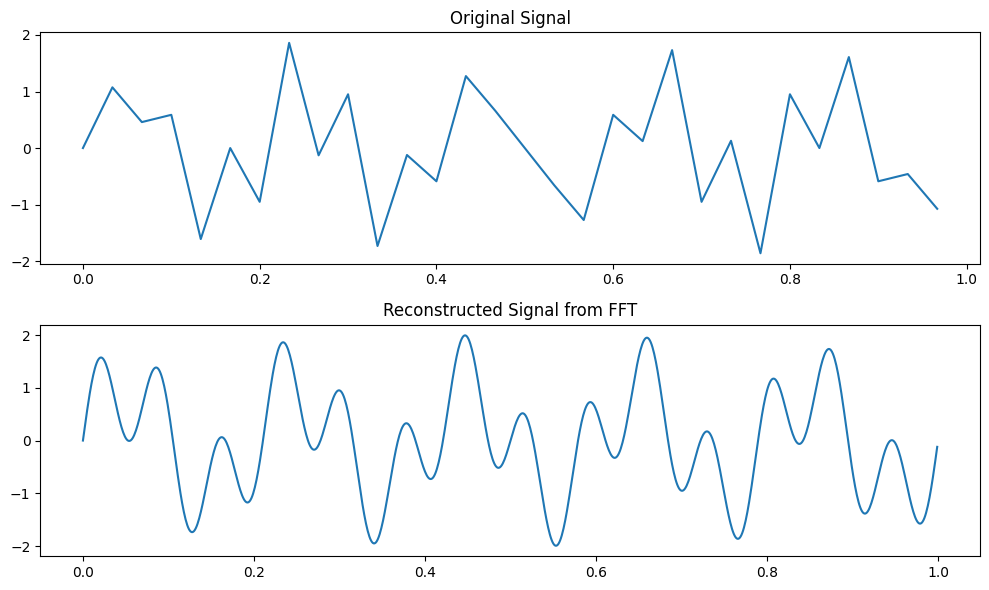

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a time-domain signal
fs = 30  # Sampling frequency (Hz)
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector
f1, f2 = 5, 14  # Frequencies of the components (Hz)
signal = np.sin(2 * np.pi * f1 * t) + np.sin(2*np.pi*f2*t)  # Signal
# signal = np.pow(np.sin(2*np.pi*f1*t), 2)

# Perform FFT
signal_fft = np.fft.fft(signal)

# Reconstruct the signal using IFFT
t_new = np.linspace(0,1,1000,endpoint=False)
def reconstructor(t):
    n1 = np.arange(0, int((signal.size+1) / 2))
    n2 = np.arange(-1*int((signal.size) / 2), 0)
    n = np.concatenate((n1, n2))
    tn = t * n
    exp_component = np.exp(1j*2*np.pi*tn)
    return 1/(n.size) * np.sum(np.multiply(signal_fft,exp_component))
np_reconstructor = np.frompyfunc(reconstructor, 1, 1)
reconstructed_signal = np_reconstructor(t_new)

target_signal = np.sin(2 * np.pi * f1 * t_new) + np.sin(2*np.pi*f2*t_new)
# Plot the original and reconstructed signals
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.title('Original Signal')
#plt.plot(t_new, target_signal)
plt.plot(t, signal)

plt.subplot(2, 1, 2)
plt.title('Reconstructed Signal from FFT')
plt.plot(t_new, reconstructed_signal.real)  # Take the real part

plt.tight_layout()
plt.show()